In [95]:
#import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler ,LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score,classification_report,recall_score,precision_score, f1_score
%matplotlib inline

In [2]:
#store in a dataframe
bank= pd.read_csv("bank.csv")
df=pd.DataFrame(bank)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [3]:
#check the shape of the data
df.shape

(11162, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [5]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [6]:
#check for missing values
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [58]:
#check the number of unique values in eah column
df.nunique()

age            76
job            12
marital         3
education       4
default         2
balance      3805
housing         2
loan            2
contact         3
day            31
month          12
duration     1428
campaign       36
pdays         472
previous       34
deposit         2
dtype: int64

In [8]:
# Create a list for categorical values
cat=[]
for i in df.columns:
    if df[i].dtype=='object':
        cat.append(i)
cat

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'deposit']

In [9]:
# Create a list for numerical values
num=[]
for i in df.columns:
    if df[i].dtype=='int64':
        num.append(i)
num

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

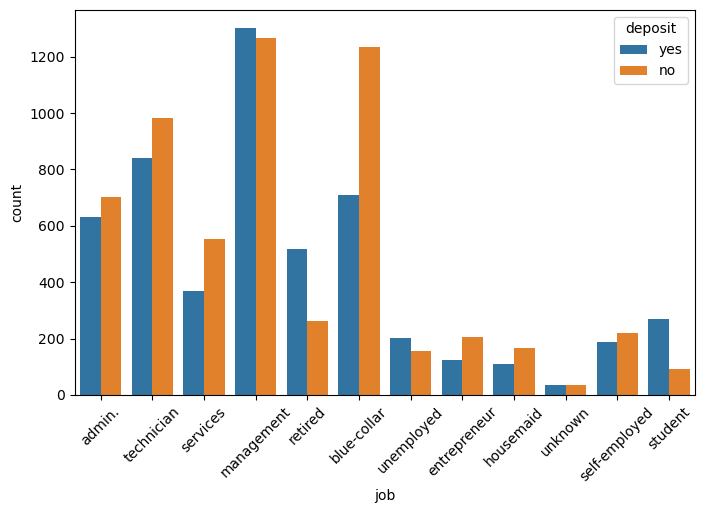

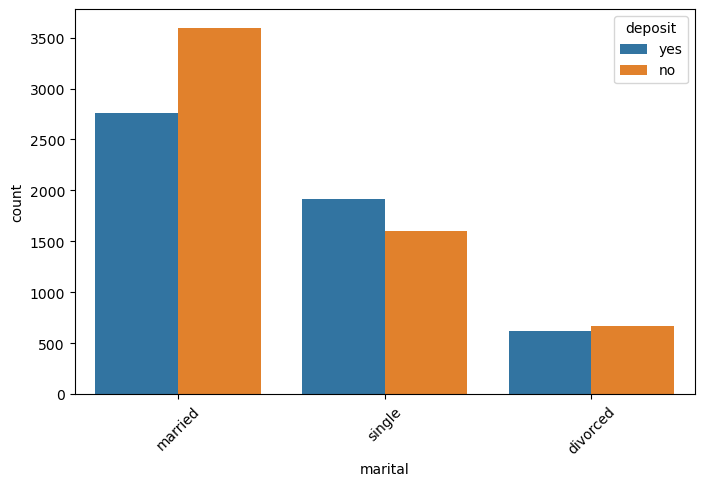

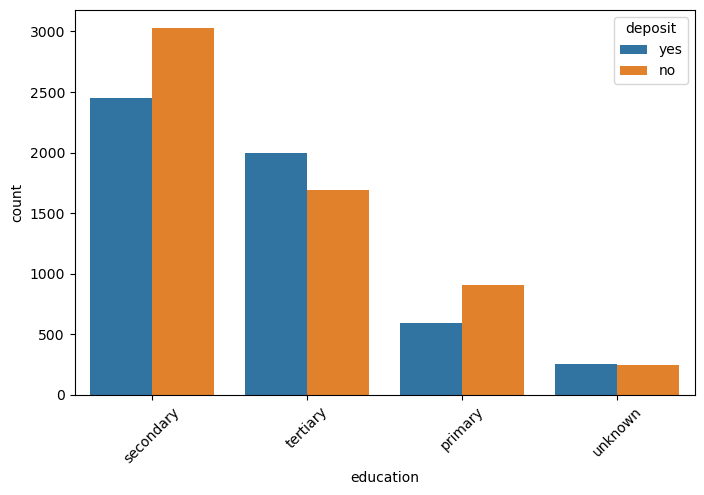

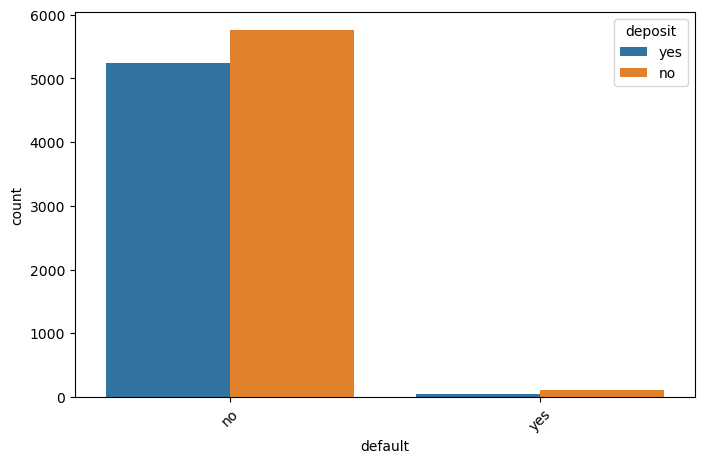

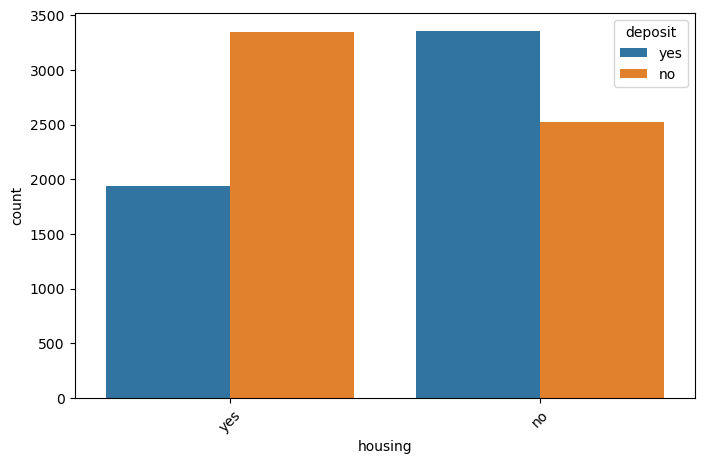

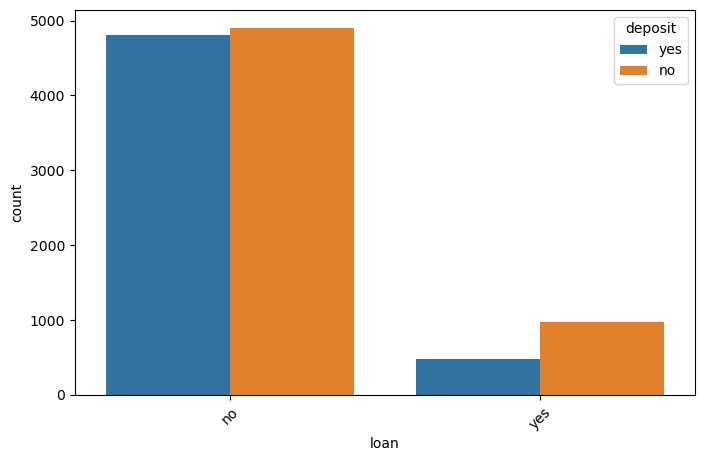

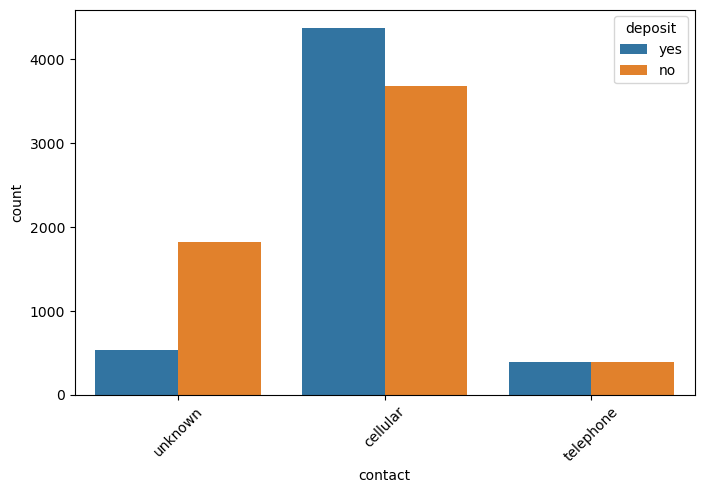

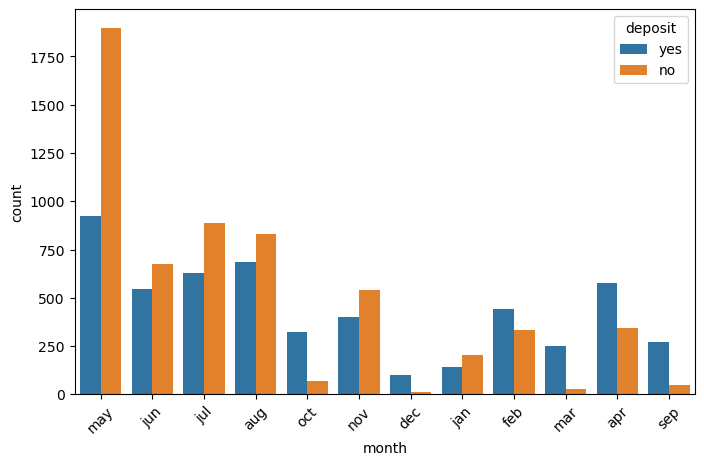

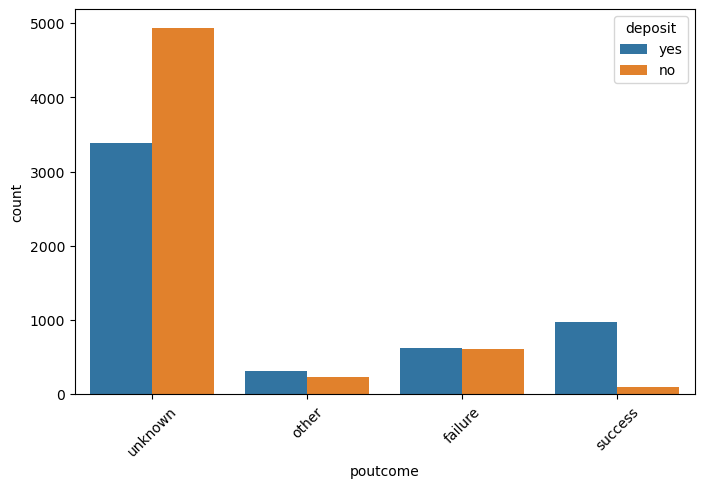

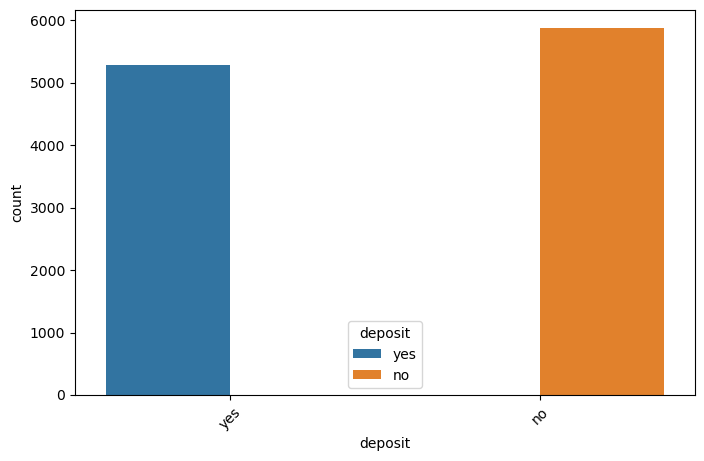

In [10]:
#Visualizations for the categorical columns
for i, features in enumerate(cat):
    plt.figure(figsize=(8,5))
    sns.countplot(x=df[features], hue= df['deposit'],)
    plt.xticks(rotation=45)
    plt.show()

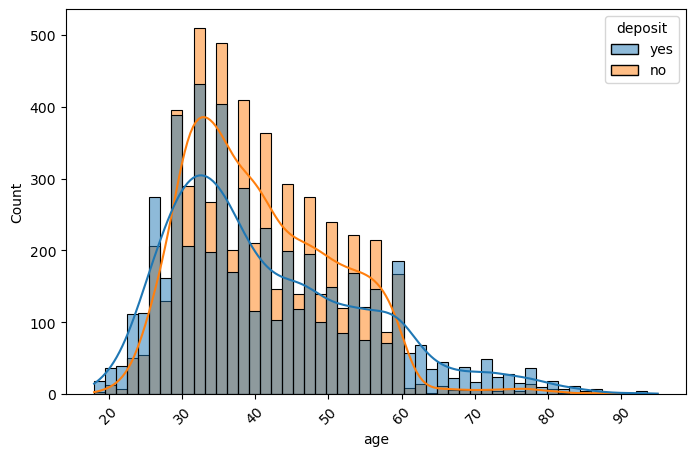

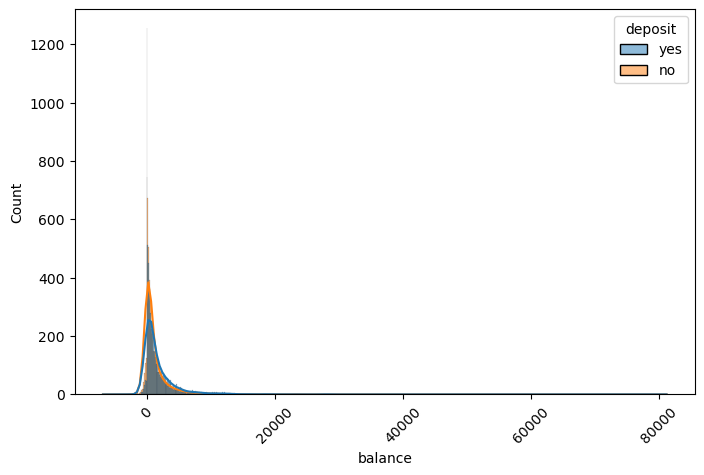

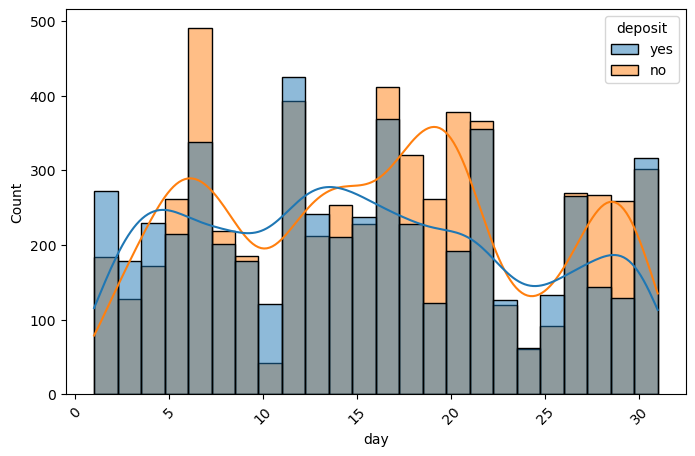

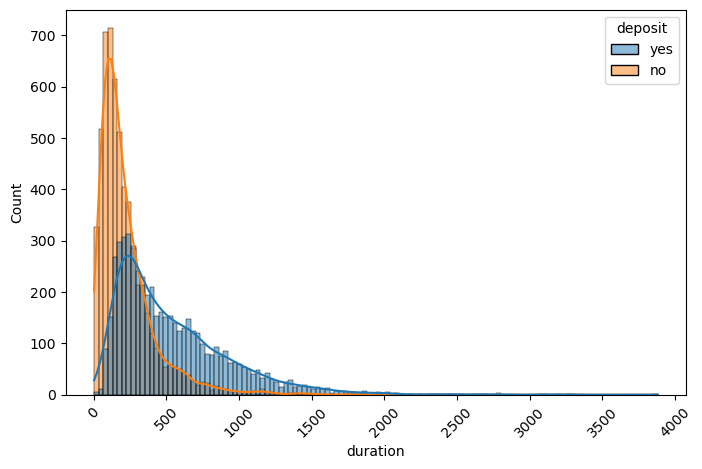

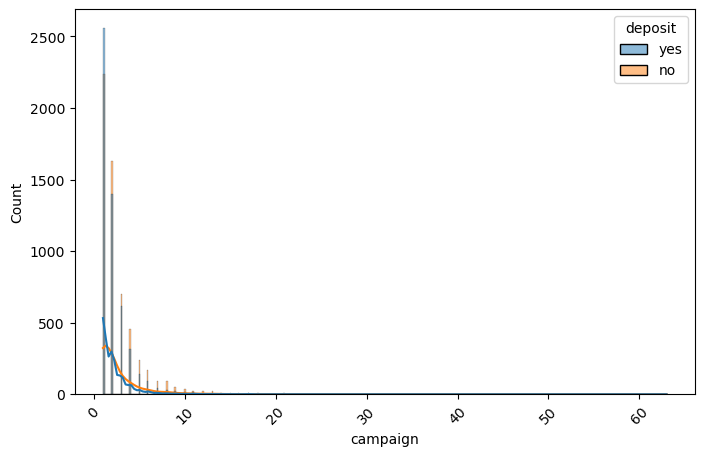

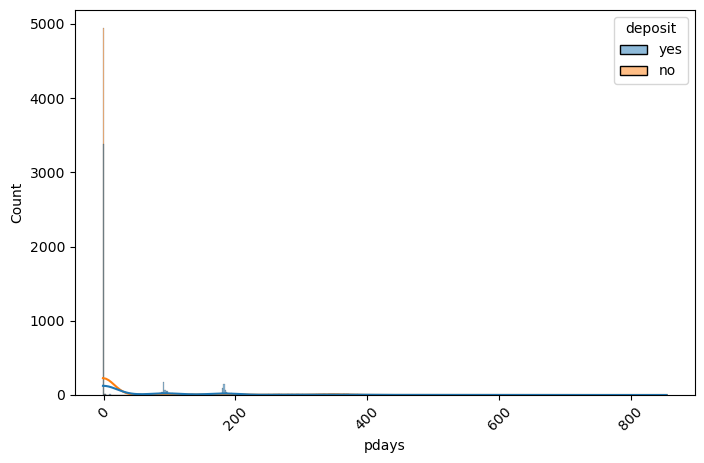

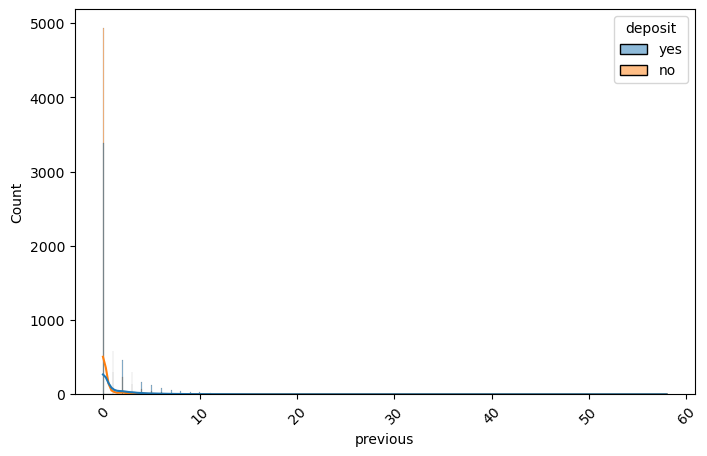

In [11]:
#Visualizations for the numerical columns
for i, features in enumerate(num):
    plt.figure(figsize=(8,5))
    sns.histplot(x=df[features], hue= df['deposit'], kde=True)
    plt.xticks(rotation=45)
    plt.show()

In [12]:
#Create the key for the pie chart distribution of the deposit subscription
key=df['deposit'].value_counts()
key

deposit
no     5873
yes    5289
Name: count, dtype: int64

In [13]:
label=df['deposit'].value_counts().index
label

Index(['no', 'yes'], dtype='object', name='deposit')

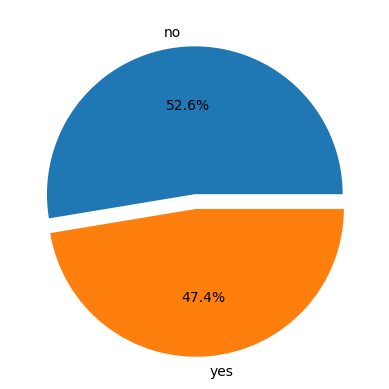

In [14]:
plt.pie(key.values, labels=label,autopct='%.1f%%', explode=(0,0.1))
plt.show()

In [15]:
#Encode the categorical columns
label_encoders = {}

for column in cat:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

    # Display the mapping for each
    print(f"Mappings for {column}:")
    for index, label in enumerate(le.classes_):
        print(f"{label} -> {index}")
    print()


Mappings for job:
admin. -> 0
blue-collar -> 1
entrepreneur -> 2
housemaid -> 3
management -> 4
retired -> 5
self-employed -> 6
services -> 7
student -> 8
technician -> 9
unemployed -> 10
unknown -> 11

Mappings for marital:
divorced -> 0
married -> 1
single -> 2

Mappings for education:
primary -> 0
secondary -> 1
tertiary -> 2
unknown -> 3

Mappings for default:
no -> 0
yes -> 1

Mappings for housing:
no -> 0
yes -> 1

Mappings for loan:
no -> 0
yes -> 1

Mappings for contact:
cellular -> 0
telephone -> 1
unknown -> 2

Mappings for month:
apr -> 0
aug -> 1
dec -> 2
feb -> 3
jan -> 4
jul -> 5
jun -> 6
mar -> 7
may -> 8
nov -> 9
oct -> 10
sep -> 11

Mappings for poutcome:
failure -> 0
other -> 1
success -> 2
unknown -> 3

Mappings for deposit:
no -> 0
yes -> 1



In [16]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1


<Axes: >

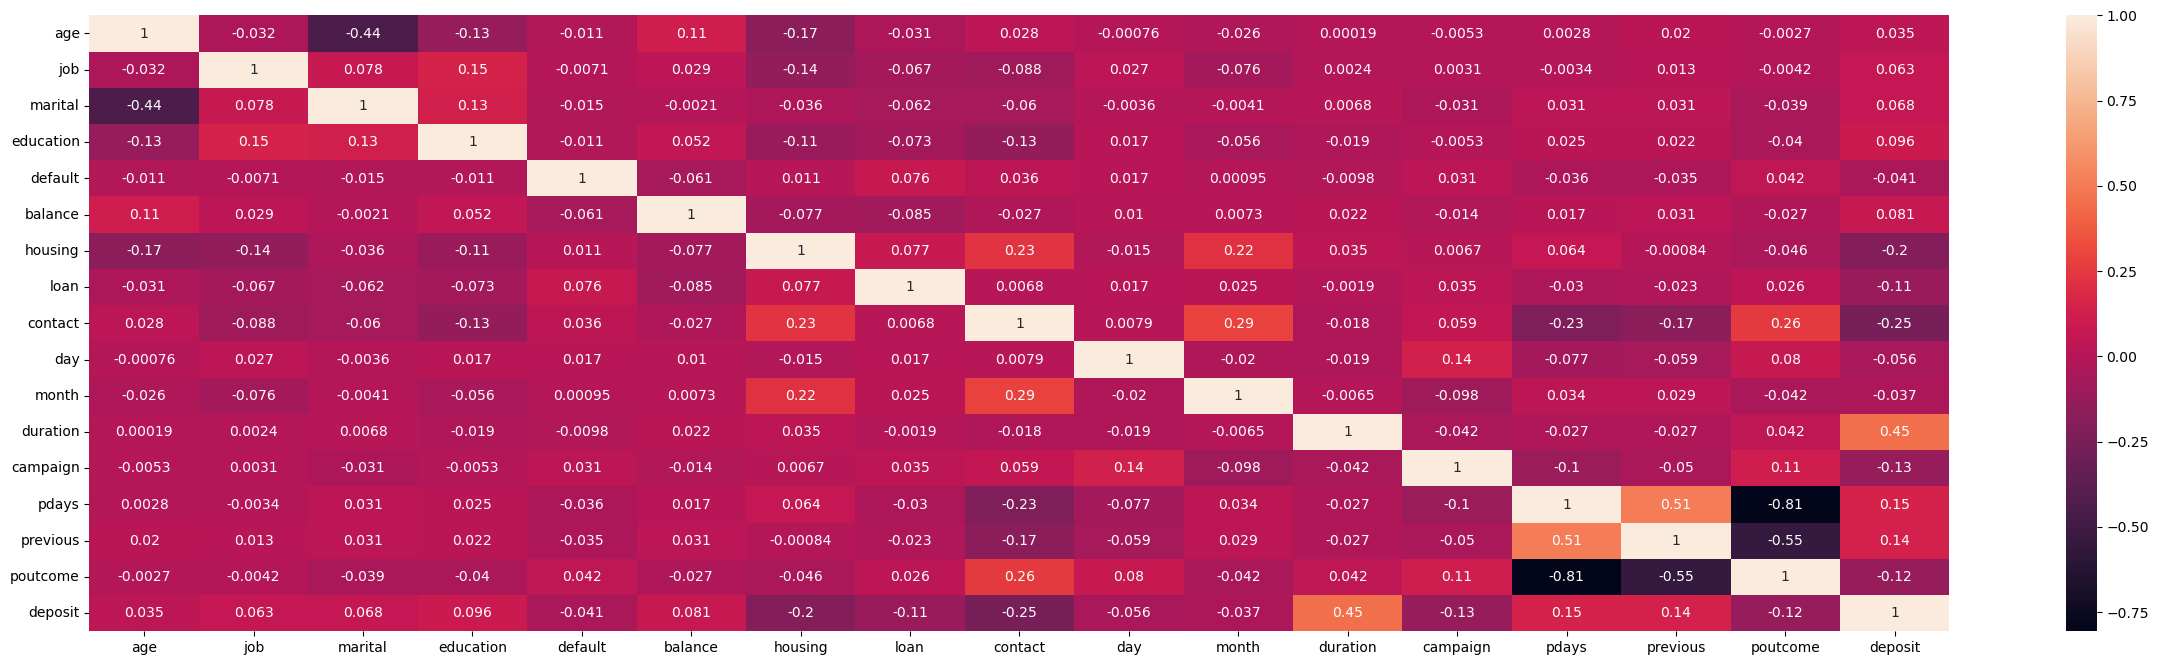

In [17]:
plt.figure(figsize=(30,8))
sns.heatmap(df.corr(), annot=True, )

In [18]:
#view the correlation between deposit and other variables
cor= df.corr()['deposit'].sort_values(ascending= False )
cor

deposit      1.000000
duration     0.451919
pdays        0.151593
previous     0.139867
education    0.095948
balance      0.081129
marital      0.067610
job          0.063395
age          0.034901
month       -0.037121
default     -0.040680
day         -0.056326
loan        -0.110580
poutcome    -0.122369
campaign    -0.128081
housing     -0.203888
contact     -0.249847
Name: deposit, dtype: float64

In [19]:
#poutcome has a very high correlation with pdays and some other variables so we drop it
df=df.drop(columns='poutcome',axis= 1)

In [20]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,1


In [21]:
#split the preprocessed data into variable and target
x=df.drop('deposit', axis= 1)
y=df['deposit']

In [22]:
#split the data for training our model
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.1, random_state= 11111)

In [23]:
#declare an object model of class decision tree classifier and predict with test data
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
ypred= model.predict(x_test)
ypred

array([1, 1, 0, ..., 1, 1, 0])

In [24]:
#print the accuracy score for the model
acc= accuracy_score(y_test,ypred)
acc

0.7690241718889884

In [25]:
#print the cross_val_scores score for the model
cval=cross_val_score(model, x_train, y_train, cv=5).mean()
cval

0.7714285714285715

In [26]:
#another way to calculate accuracy score on the model
model.score(x_test,y_test)

0.7690241718889884

In [37]:
#create parameter dict for hyper paremeter tuning
param= {'criterion' : ["gini", "entropy", "log_loss"],'max_depth' :[2,5,7,10,12,15,20,25,30, None],
        'min_samples_leaf':[10,15,20,25,30,35], 'random_state' : [42,142,1000,1111]}

In [38]:
#use gridsearchcv or randomizedsearchcv, n_jobs=-1 to use all available processors
gscv= GridSearchCV(model,param, n_jobs=-1,cv=5, verbose=3)
gscv.fit(x_train, y_train)

Fitting 5 folds for each of 720 candidates, totalling 3600 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 5, 7, 10, 12, 15, 20, 25, 30, None],
                         'min_samples_leaf': [10, 15, 20, 25, 30, 35],
                         'random_state': [42, 142, 1000, 1111]},
             verbose=3)

#### Cross validation score helps to prevent overfitting

In [36]:
#create dataframe for the crossvalidation results and arrange from highest the necessary parameters
df1= pd.DataFrame(gscv.cv_results_)
cvresults= df1[['param_criterion','param_max_depth','param_max_features','param_min_samples_leaf','param_random_state','mean_test_score']]
cvresults.sort_values(by=['mean_test_score'], ascending=False)

,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_random_state,mean_test_score
567,gini,15,None,25,1111,0.821304
951,gini,None,None,25,1111,0.821304
757,gini,25,None,25,142,0.821304
756,gini,25,None,25,42,0.821304
660,gini,20,None,25,42,0.821304
...,...,...,...,...,...,...
2803,log_loss,None,auto,30,1111,NaN
2804,log_loss,None,auto,35,42,NaN
2805,log_loss,None,auto,35,142,NaN
2806,log_loss,None,auto,35,1000,NaN


In [35]:
#check for the best score just incase to crosscheck
gscv.best_score_

0.821304131408661

In [29]:
#check for the best parameters for the model now
gscv.best_params_

{'criterion': 'gini',
 'max_depth': 15,
 'max_features': None,
 'min_samples_leaf': 25,
 'random_state': 42}

In [31]:
cross_val_score(gscv.best_estimator_, x_test, y_test, cv=5).mean()

0.7851257206918641

In [32]:
clf=gscv.best_estimator_

In [33]:
#This is the decision tree now
clf=clf.fit(x_train, y_train)
ypred=clf.predict(x_test)
clf.score(x_test, y_test)

0.8290062667860341

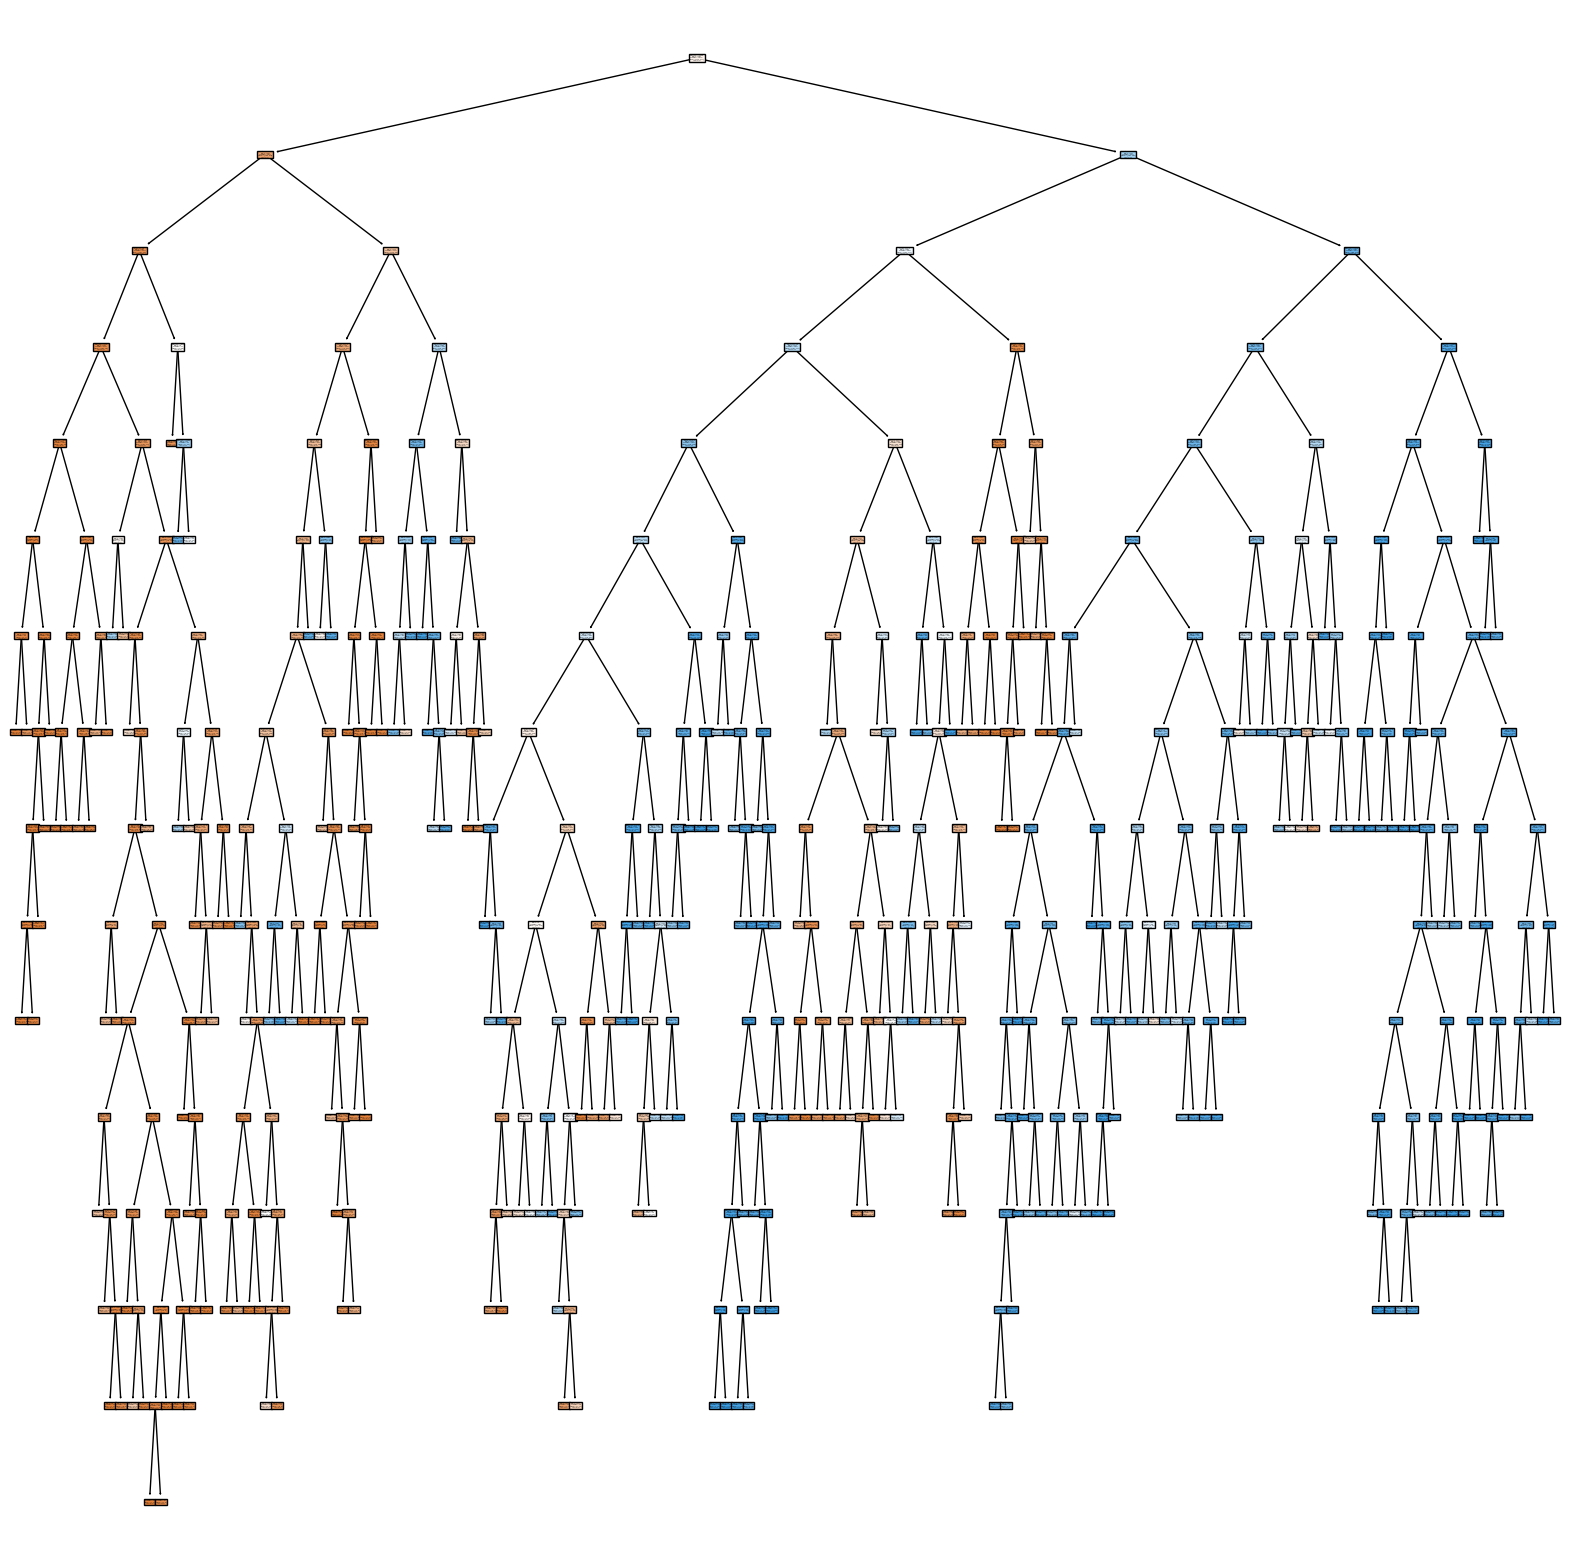

In [34]:
#Visualizing the decision tree
fig=plt.figure(figsize=(20,20))
para=x.columns.to_list()
dt=plot_tree(clf, feature_names=para, class_names=['No','yes'], label='all', filled=True)
plt.show()

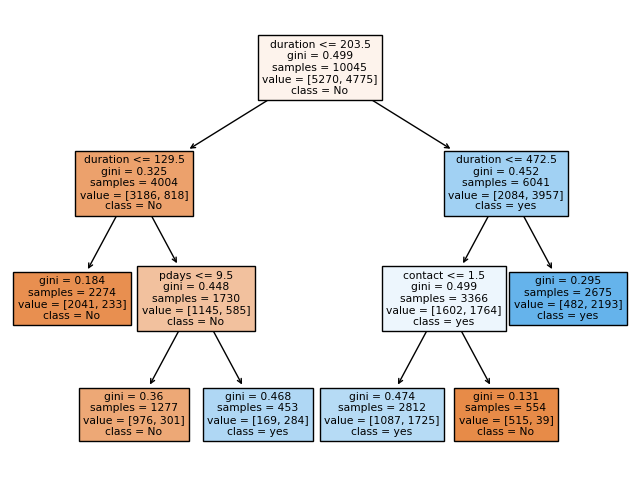

In [103]:
#pruning and visualizing the pruned decision tree
clf.ccp_alpha=0.01
clf.fit(x_train, y_train)
ynew= clf.predict(x_test)

fig=plt.figure(figsize=(8,6))
para=x.columns.to_list()
plot_tree(clf, feature_names=para, class_names=['No','yes'], label='all', filled=True)
plt.show()

In [104]:
#Evaluation metrics used
print('Accuracy score: ',accuracy_score(y_test, ynew)*100)#not the best for imbalanced classes
print('Precision score: ',precision_score(y_test, ynew)*100)
print('Recall score: ', recall_score(y_test, ynew)*100)
print('F-1 score: ', f1_score(y_test, ynew)*100)


Accuracy score:  76.27573858549687
Precision score:  69.48356807511738
Recall score:  86.38132295719845
F-1 score:  77.01647875108412


In [94]:
fi=pd.DataFrame( {'Features':x.columns , 'importance': clf.feature_importances_}).sort_values(ascending= False, by='importance').reset_index(drop='index')
fi

,Features,importance
0,duration,0.782244
1,contact,0.158370
2,pdays,0.059386
3,age,0.000000
4,job,0.000000
5,marital,0.000000
6,education,0.000000
7,default,0.000000
8,balance,0.000000
9,housing,0.000000


#### Our model estimates duration as the most important feature, meaning the longer clients were engaged effectively, the most likely they are to subscribe.Clients who dropped their cellular number were most likely to subscribe. Also, number of days that passed by after the client was last contacted from a previous campaign played an important role. 
#### Our model performs very well

### INSIGHTS

- Most subscribers are into management jobs.
- Most of our clients are either management, bluecollar, technicians or admins and thus has higher returns on subscribers as compared to the rest.
- Most of our customers are married, thus return a high number of subscribers but a higher percentage of single people subscribed.
- Clients who gained up to secondary education are most likely to subscribe
- Clients who do not owe any personal or housing loan most likely subscribed 
- Only about 47.4% of clients subscribed
- Most subscribers provided cellular contacts instead of telephone
- Defaulters are least likely to subscribe
- June had a significant marginal decrease in non-subscribers. They probably decided to give us a chance after previous effort.
- About 50% of the failed attempts in the previous marketing campaign subscribed while most of the successful ones remained n their status